In [188]:
# Import dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [189]:
# Create the path to load the file
map_data_path = Path("Resources/merged_data.csv")
all_map_data_path = Path("Resources/merged_data.csv")

# Store the data into a dataframe
map_df = pd.read_csv(map_data_path, encoding="ISO-8859-1")
all_map_df = pd.read_csv(all_map_data_path, encoding="ISO-8859-1")
map_df.head()

,name,gender,teacher,ethnicity,sped,lep,ed,gt,dyslexia,fa_16,...,sp_20,fa_20,wi_21,sp_21,fa_21,wi_22,sp_22,fa_22,wi_23,sp_23
0,Molly Mora,F,Kirby,A,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,209.0,208.0,215.0,220.0,227.0,227.0,228.0,228.0,233.0
1,Kennedy Black,F,Gates,H,NaN,0,F,NaN,NaN,NaN,...,NaN,194.0,198.0,207.0,206.0,210.0,211.0,216.0,216.0,215.0
2,Nikolai Warren,M,Gates,A,NaN,M5,NaN,NaN,NaN,NaN,...,NaN,217.0,216.0,221.0,228.0,229.0,231.0,225.0,236.0,240.0
3,Efrain Meza,M,Lawrence,W,NaN,ESL,F,NaN,NaN,NaN,...,NaN,184.0,197.0,201.0,192.0,211.0,216.0,213.0,222.0,219.0
4,Valentino Houston,M,Kirby,W,NaN,NaN,NaN,Y,NaN,NaN,...,NaN,214.0,228.0,236.0,230.0,239.0,244.0,233.0,235.0,246.0


# Data Clean-Up

In [190]:
# Check the column names 
map_df.columns

Index(['name', 'gender', 'teacher', 'ethnicity', 'sped', 'lep', 'ed', 'gt',
       'dyslexia', 'fa_16', 'wi_17', 'sp_17', 'wi_18', 'sp_18', 'wi_19',
       'sp_19', 'fa_19', 'wi_20', 'sp_20', 'fa_20', 'wi_21', 'sp_21', 'fa_21',
       'wi_22', 'sp_22', 'fa_22', 'wi_23', 'sp_23'],
      dtype='object')

In [191]:
# Rename all the columns to describe what the values are about 
renamed_columns = map_df.rename(columns={"fa_16":"fall_2016_scores",
                                        "wi_17":"winter_2017_scores",
                                        "sp_17":"spring_2017_scores",
                                        "wi_18":"winter_2018_scores",
                                        "sp_18":"spring_2018_scores",
                                        "wi_19":"winter_2019_scores",
                                        "sp_19":"spring_2019_scores",
                                        "fa_19":"fall_2019_scores",
                                        "wi_20":"winter_2020_scores",
                                        "sp_20":"spring_2020_scores",
                                        "fa_20":"fall_2020_scores",
                                        "wi_21":"winter_2021_scores",
                                        "sp_21":"spring_2021_scores",
                                        "fa_21":"fall_2021_scores",
                                        "wi_22":"winter_2022_scores",
                                        "sp_22":"spring_2022_scores",
                                        "fa_22":"fall_2022_scores",
                                        "wi_23":"winter_2023_scores",
                                        "sp_23":"spring_2023_scores"});

map_df = renamed_columns
map_df.head()

,name,gender,teacher,ethnicity,sped,lep,ed,gt,dyslexia,fall_2016_scores,...,spring_2020_scores,fall_2020_scores,winter_2021_scores,spring_2021_scores,fall_2021_scores,winter_2022_scores,spring_2022_scores,fall_2022_scores,winter_2023_scores,spring_2023_scores
0,Molly Mora,F,Kirby,A,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,209.0,208.0,215.0,220.0,227.0,227.0,228.0,228.0,233.0
1,Kennedy Black,F,Gates,H,NaN,0,F,NaN,NaN,NaN,...,NaN,194.0,198.0,207.0,206.0,210.0,211.0,216.0,216.0,215.0
2,Nikolai Warren,M,Gates,A,NaN,M5,NaN,NaN,NaN,NaN,...,NaN,217.0,216.0,221.0,228.0,229.0,231.0,225.0,236.0,240.0
3,Efrain Meza,M,Lawrence,W,NaN,ESL,F,NaN,NaN,NaN,...,NaN,184.0,197.0,201.0,192.0,211.0,216.0,213.0,222.0,219.0
4,Valentino Houston,M,Kirby,W,NaN,NaN,NaN,Y,NaN,NaN,...,NaN,214.0,228.0,236.0,230.0,239.0,244.0,233.0,235.0,246.0


# Student Analysis

The following section will find student averages on the MAP test per year. Students are arranged by their sixth grade math teacher. This does not mean they were taught by the same teacher from Kindergarten to Sixth Grade. This was done to keep scores consistent amongst each year. 

In [192]:
# Find the average MAP scores from 2016-2023
avg_scores = map_df.groupby(["teacher"])["fall_2016_scores",
                                        "winter_2017_scores",
                                        "spring_2017_scores",
                                        "winter_2018_scores",
                                        "spring_2018_scores",
                                        "winter_2019_scores",
                                        "spring_2019_scores",
                                        "fall_2019_scores",
                                        "winter_2020_scores",
                                        "spring_2020_scores",
                                        "fall_2020_scores",
                                        "winter_2021_scores",
                                        "spring_2021_scores",
                                        "fall_2021_scores",
                                        "winter_2022_scores",
                                        "spring_2022_scores",
                                        "fall_2022_scores",
                                        "winter_2023_scores",
                                        "spring_2023_scores"].mean()
avg_scores.head()

# Make a DataFrame with the values
avg_scores_df = pd.DataFrame(avg_scores)
avg_scores_df.head()

C:\Users\14029\AppData\Local\Temp\ipykernel_10664\3437710112.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  avg_scores = map_df.groupby(["teacher"])["fall_2016_scores",


,fall_2016_scores,winter_2017_scores,spring_2017_scores,winter_2018_scores,spring_2018_scores,winter_2019_scores,spring_2019_scores,fall_2019_scores,winter_2020_scores,spring_2020_scores,fall_2020_scores,winter_2021_scores,spring_2021_scores,fall_2021_scores,winter_2022_scores,spring_2022_scores,fall_2022_scores,winter_2023_scores,spring_2023_scores
teacher,,,,,,,,,,,,,,,,,,,
Gates,NaN,NaN,164.571429,170.482759,183.218750,178.818182,188.030303,183.931034,194.861111,NaN,195.588235,201.171429,205.472222,203.027027,211.216216,215.945946,211.615385,215.850000,217.710526
Kirby,149.000000,NaN,178.090909,181.571429,197.611111,193.072464,201.416667,193.933333,207.232877,210.333333,210.638889,216.592593,221.292683,221.430233,228.091954,234.218391,227.945652,231.684783,238.921348
Lawrence,131.333333,149.0,158.666667,164.795455,177.851064,176.448980,187.812500,183.239130,192.142857,NaN,196.241379,197.827586,203.400000,201.400000,209.227273,212.439394,211.223881,215.926471,221.521739
Paulson,138.800000,154.5,166.555556,168.133333,179.419355,180.758621,186.645161,186.035714,194.500000,NaN,197.031250,201.363636,203.794118,204.805556,209.342857,214.085714,207.972222,215.763158,218.170732


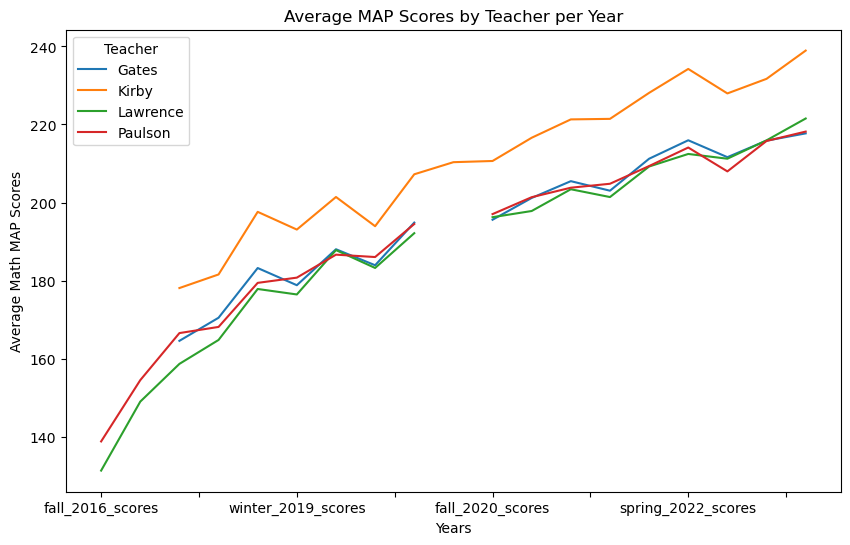

In [193]:
# Transpose the DataFrame
avg_scores_df = avg_scores_df.transpose()

# Plot the line graph
avg_scores_df.plot(kind="line",figsize=(10,6))
plt.title("Average MAP Scores by Teacher per Year")
plt.xlabel("Years")
plt.ylabel("Average Math MAP Scores")
plt.legend(title="Teacher", loc="upper left")
plt.show()

In [194]:
# Find scores to compare before COVID and after COVID
before_after_covid = map_df.groupby(["teacher"])[
                                        "fall_2019_scores",
                                        "winter_2020_scores",
                                        "spring_2020_scores",
                                        "fall_2020_scores",
                                        "winter_2021_scores",
                                        "spring_2021_scores"
                                        ].mean()
before_after_covid.head()

# Make a DataFrame with the information to compare scores
before_after_covid_df = pd.DataFrame(before_after_covid)
before_after_covid_df.head()

C:\Users\14029\AppData\Local\Temp\ipykernel_10664\1203629614.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  before_after_covid = map_df.groupby(["teacher"])[


,fall_2019_scores,winter_2020_scores,spring_2020_scores,fall_2020_scores,winter_2021_scores,spring_2021_scores
teacher,,,,,,
Gates,183.931034,194.861111,NaN,195.588235,201.171429,205.472222
Kirby,193.933333,207.232877,210.333333,210.638889,216.592593,221.292683
Lawrence,183.239130,192.142857,NaN,196.241379,197.827586,203.400000
Paulson,186.035714,194.500000,NaN,197.031250,201.363636,203.794118


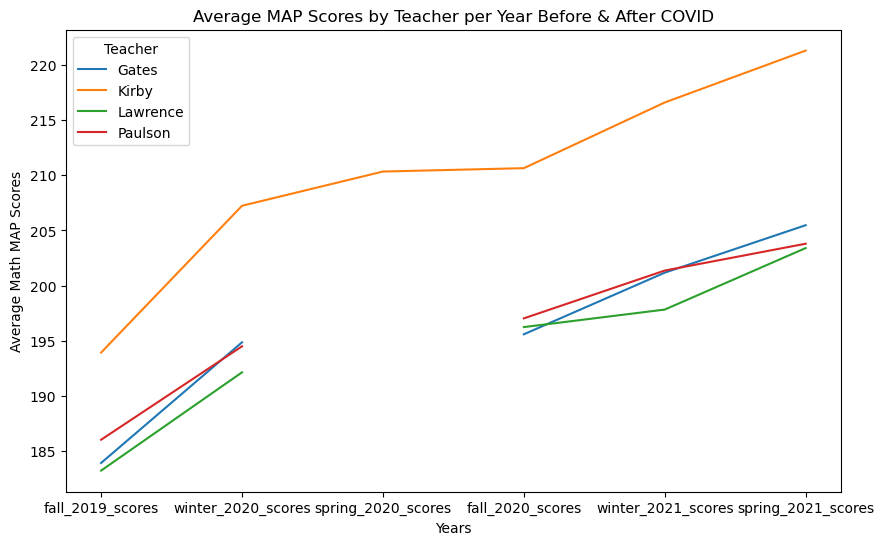

In [195]:
# Transpose the DataFrame
before_after_covid_df = before_after_covid_df.transpose()

# Get a closer view of COVID MAP scores
before_after_covid_df.plot(kind="line",figsize=(10,6))
plt.title("Average MAP Scores by Teacher per Year Before & After COVID")
plt.xlabel("Years")
plt.ylabel("Average Math MAP Scores")
plt.legend(title="Teacher", loc="upper left")
plt.show()

In [196]:
before_after_covid_df.head()

teacher,Gates,Kirby,Lawrence,Paulson
fall_2019_scores,183.931034,193.933333,183.239130,186.035714
winter_2020_scores,194.861111,207.232877,192.142857,194.500000
spring_2020_scores,NaN,210.333333,NaN,NaN
fall_2020_scores,195.588235,210.638889,196.241379,197.031250
winter_2021_scores,201.171429,216.592593,197.827586,201.363636


In [197]:
avg_scores.head()

,fall_2016_scores,winter_2017_scores,spring_2017_scores,winter_2018_scores,spring_2018_scores,winter_2019_scores,spring_2019_scores,fall_2019_scores,winter_2020_scores,spring_2020_scores,fall_2020_scores,winter_2021_scores,spring_2021_scores,fall_2021_scores,winter_2022_scores,spring_2022_scores,fall_2022_scores,winter_2023_scores,spring_2023_scores
teacher,,,,,,,,,,,,,,,,,,,
Gates,NaN,NaN,164.571429,170.482759,183.218750,178.818182,188.030303,183.931034,194.861111,NaN,195.588235,201.171429,205.472222,203.027027,211.216216,215.945946,211.615385,215.850000,217.710526
Kirby,149.000000,NaN,178.090909,181.571429,197.611111,193.072464,201.416667,193.933333,207.232877,210.333333,210.638889,216.592593,221.292683,221.430233,228.091954,234.218391,227.945652,231.684783,238.921348
Lawrence,131.333333,149.0,158.666667,164.795455,177.851064,176.448980,187.812500,183.239130,192.142857,NaN,196.241379,197.827586,203.400000,201.400000,209.227273,212.439394,211.223881,215.926471,221.521739
Paulson,138.800000,154.5,166.555556,168.133333,179.419355,180.758621,186.645161,186.035714,194.500000,NaN,197.031250,201.363636,203.794118,204.805556,209.342857,214.085714,207.972222,215.763158,218.170732


C:\Users\14029\AppData\Local\Temp\ipykernel_10664\642705787.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  students_19_20_school_year = map_df.groupby(["gender"])["fall_2019_scores","winter_2019_scores","spring_2020_scores"].mean()


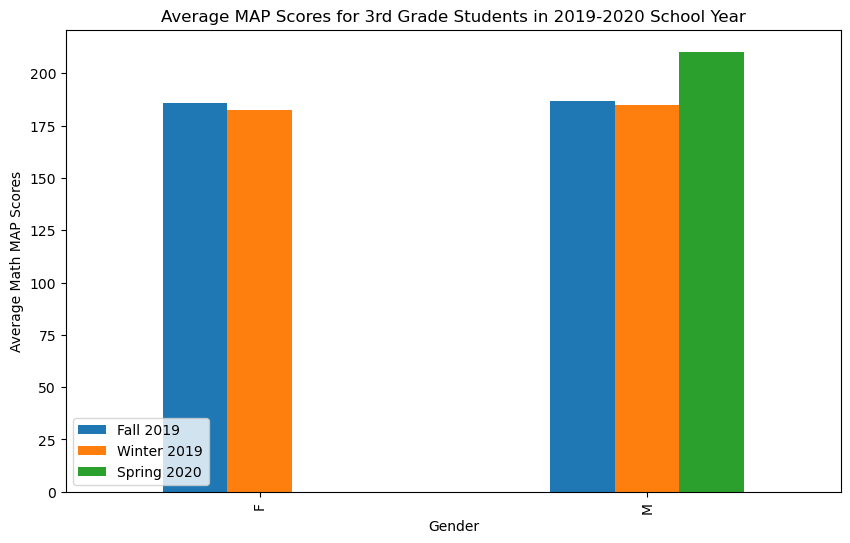

In [198]:
# Calculate the average score by gender for the 2019-2020 school year
students_19_20_school_year = map_df.groupby(["gender"])["fall_2019_scores","winter_2019_scores","spring_2020_scores"].mean()
students_19_20_school_year

# Create a DataFrame to represent 2019-2020 School Year Results for 3rd Grade Students
students_19_20_school_year_df = pd.DataFrame(students_19_20_school_year)

# Plot the results in a Bar Graph 
# Only a few male students took the Spring 2020 MAP test. Should answer this question "Why did kiddos take the Spring 2020 test" or "How did they take it if school wasn't in session during this time?"
students_19_20_school_year_df.plot(kind="bar",figsize=(10,6))
plt.title("Average MAP Scores for 3rd Grade Students in 2019-2020 School Year")
plt.xlabel("Gender")
plt.ylabel("Average Math MAP Scores")
plt.legend(["Fall 2019", "Winter 2019", "Spring 2020"], loc="lower left")
plt.show()

C:\Users\14029\AppData\Local\Temp\ipykernel_10664\2526604859.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  students_20_21_school_year = map_df.groupby(["gender"])["fall_2020_scores","winter_2020_scores","spring_2021_scores"].mean()


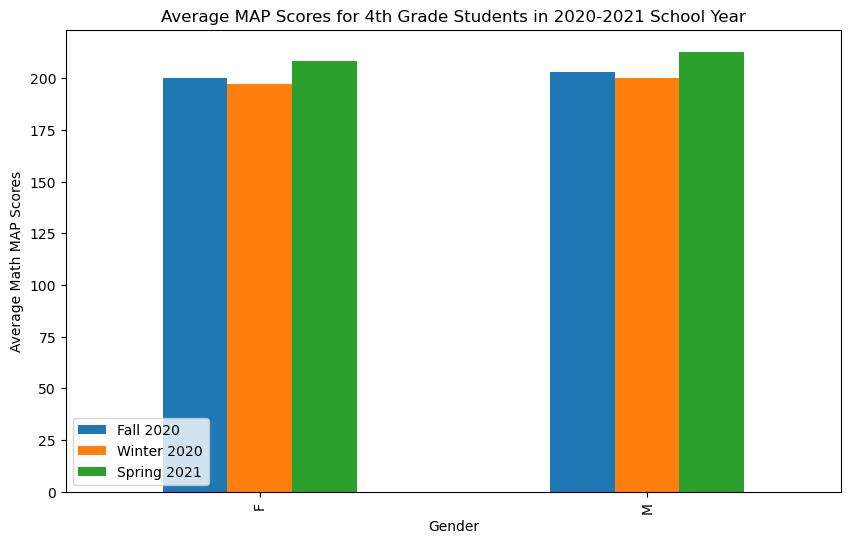

In [199]:
# Calculate the average score by gender for the 2020-2021 school year
students_20_21_school_year = map_df.groupby(["gender"])["fall_2020_scores","winter_2020_scores","spring_2021_scores"].mean()
students_20_21_school_year

# Create a DataFrame to represent 2019-2020 School Year Results for 3rd Grade Students
students_20_21_school_year_df = pd.DataFrame(students_20_21_school_year)

# Plot the results in a Bar Graph 
students_20_21_school_year_df.plot(kind="bar",figsize=(10,6))
plt.title("Average MAP Scores for 4th Grade Students in 2020-2021 School Year")
plt.xlabel("Gender")
plt.ylabel("Average Math MAP Scores")
plt.legend(["Fall 2020", "Winter 2020", "Spring 2021"], loc="lower left")
plt.show()

C:\Users\14029\AppData\Local\Temp\ipykernel_10664\3891547197.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  students_21_22_school_year = map_df.groupby(["gender"])["fall_2021_scores","winter_2021_scores","spring_2021_scores"].mean()


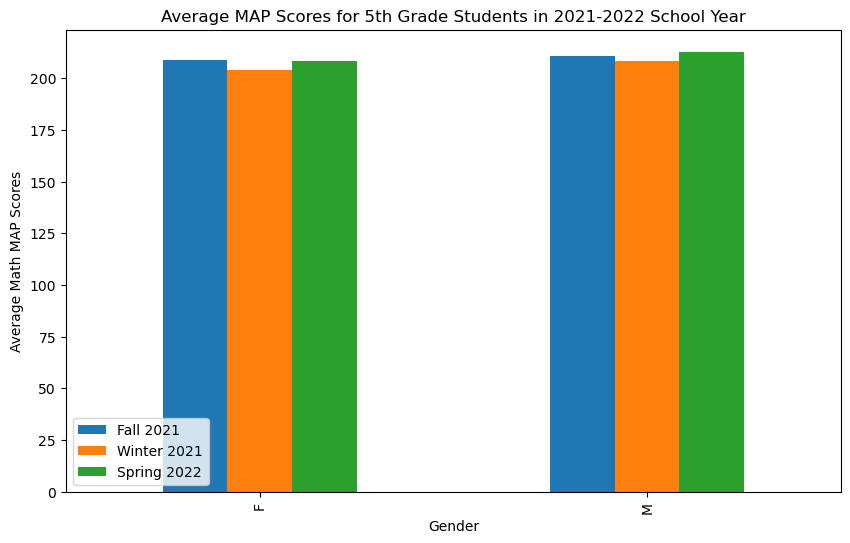

In [200]:
# Calculate the average score by gender for the 2021-2022 school year
students_21_22_school_year = map_df.groupby(["gender"])["fall_2021_scores","winter_2021_scores","spring_2021_scores"].mean()
students_21_22_school_year

# Create a DataFrame to represent 2019-2020 School Year Results for 3rd Grade Students
students_21_22_school_year_df = pd.DataFrame(students_21_22_school_year)

# Plot the results in a Bar Graph 
students_21_22_school_year_df.plot(kind="bar",figsize=(10,6))
plt.title("Average MAP Scores for 5th Grade Students in 2021-2022 School Year")
plt.xlabel("Gender")
plt.ylabel("Average Math MAP Scores")
plt.legend(["Fall 2021", "Winter 2021", "Spring 2022"], loc="lower left")
plt.show()

C:\Users\14029\AppData\Local\Temp\ipykernel_10664\1119407689.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  students_22_23_school_year = map_df.groupby(["gender"])["fall_2022_scores","winter_2023_scores","spring_2023_scores"].mean()


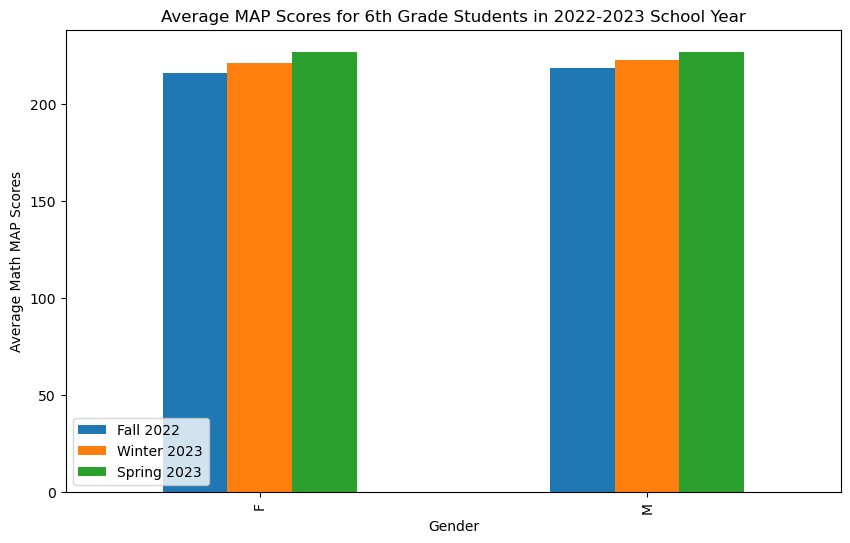

In [201]:
# Calculate the average score by gender for the 2022-2023 school year
students_22_23_school_year = map_df.groupby(["gender"])["fall_2022_scores","winter_2023_scores","spring_2023_scores"].mean()
students_22_23_school_year

# Create a DataFrame to represent 2019-2020 School Year Results for 3rd Grade Students
students_22_23_school_year_df = pd.DataFrame(students_22_23_school_year)

# Plot the results in a Bar Graph 
students_22_23_school_year_df.plot(kind="bar",figsize=(10,6))
plt.title("Average MAP Scores for 6th Grade Students in 2022-2023 School Year")
plt.xlabel("Gender")
plt.ylabel("Average Math MAP Scores")
plt.legend(["Fall 2022", "Winter 2023", "Spring 2023"], loc="lower left")
plt.show()

# 2022 - 2023 MAP Analysis

In [202]:
# Find the average score by teacher for the 2022-2023 school year
school_year_22_23 = spring_2023_avg_by_teacher = map_df.groupby(["teacher"])["fall_2022_scores","winter_2023_scores","spring_2023_scores"].mean()
school_year_22_23.head()

# Make a DataFrame with the data
school_year_22_23_df = pd.DataFrame(school_year_22_23)
school_year_22_23_df.head()

C:\Users\14029\AppData\Local\Temp\ipykernel_10664\2176583883.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  school_year_22_23 = spring_2023_avg_by_teacher = map_df.groupby(["teacher"])["fall_2022_scores","winter_2023_scores","spring_2023_scores"].mean()


,fall_2022_scores,winter_2023_scores,spring_2023_scores
teacher,,,
Gates,211.615385,215.850000,217.710526
Kirby,227.945652,231.684783,238.921348
Lawrence,211.223881,215.926471,221.521739
Paulson,207.972222,215.763158,218.170732


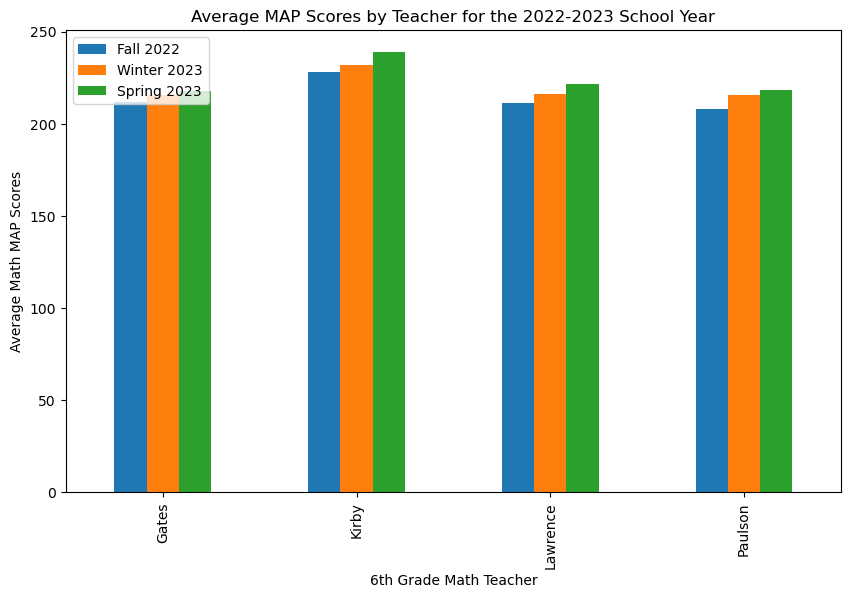

In [203]:
# Plot the average MAP scores by teacher for the 2022-2023 school year
school_year_22_23_df.plot(kind="bar",figsize=(10,6))
plt.title("Average MAP Scores by Teacher for the 2022-2023 School Year")
plt.xlabel("6th Grade Math Teacher")
plt.ylabel("Average Math MAP Scores")
plt.legend(["Fall 2022", "Winter 2023", "Spring 2023"], loc="upper left")
plt.show()

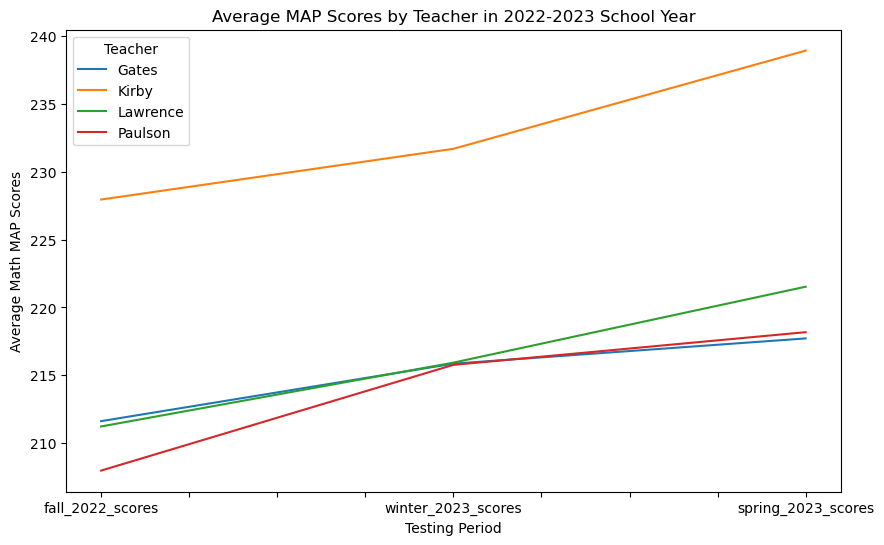

In [204]:
# Transpose the DataFrame
school_year_22_23_df = school_year_22_23_df.transpose()

# Plot the line graph
school_year_22_23_df.plot(kind="line",figsize=(10,6))
plt.title("Average MAP Scores by Teacher in 2022-2023 School Year")
plt.xlabel("Testing Period")
plt.ylabel("Average Math MAP Scores")
plt.legend(title="Teacher", loc="upper left")
plt.show()